# Machine Learning Project - Predicting Flipcart Sales Prices

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report

## Store the CSV File

In [ ]:
df=pd.read_csv("/content/Flipkart_Mobiles.csv");
df.head()


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [ ]:
df['Brand']=df['Brand'].str.strip();
df['Model']=df['Model'].str.strip();


In [ ]:
print(df.describe());

            Rating  Selling Price  Original Price
count  2970.000000    3114.000000     3114.000000
mean      4.243098   26436.625562    28333.473025
std       0.271991   30066.892622    31525.599889
min       2.300000    1000.000000     1000.000000
25%       4.100000    9990.000000    10030.250000
50%       4.300000   15000.000000    16889.500000
75%       4.400000   28999.000000    31500.000000
max       5.000000  179900.000000   189999.000000


## Finding the type and No.of Null and Non-Null values in all columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


## Finding the Number of rows and columns

In [ ]:
print(df.shape);

(3114, 8)


## Finding the Number of NULL Values of each column

In [ ]:
print(df.isna().sum());

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64


## Drop the NULL Values

In [ ]:
df1=df.copy(deep=True);
df1.dropna(inplace=True);
print(df1.isna().sum())

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64


##Finding the duplicate Values

In [ ]:
df1.duplicated().sum()

91

## Drop the duplicate values

In [ ]:

df1.drop_duplicates(inplace=True);
print(df1.duplicated().sum());

0


## Findig the No.of NULL and Non-NULL values in all columns

In [ ]:
df1.info();
print(df1["Memory"].value_counts());

<class 'pandas.core.frame.DataFrame'>
Index: 2806 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           2806 non-null   object 
 1   Model           2806 non-null   object 
 2   Color           2806 non-null   object 
 3   Memory          2806 non-null   object 
 4   Storage         2806 non-null   object 
 5   Rating          2806 non-null   float64
 6   Selling Price   2806 non-null   int64  
 7   Original Price  2806 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 197.3+ KB
Memory
4 GB      697
3 GB      458
6 GB      440
2 GB      359
8 GB      322
1 GB      191
4GB       105
12 GB      55
512 MB     46
4 MB       37
1.5 GB     29
64 MB      14
32 MB      14
16 MB      12
8 MB        9
768 MB      6
10 MB       3
2 MB        2
46 MB       2
153 MB      1
128 MB      1
16 GB       1
100 MB      1
30 MB       1
Name: count, dtype: int64


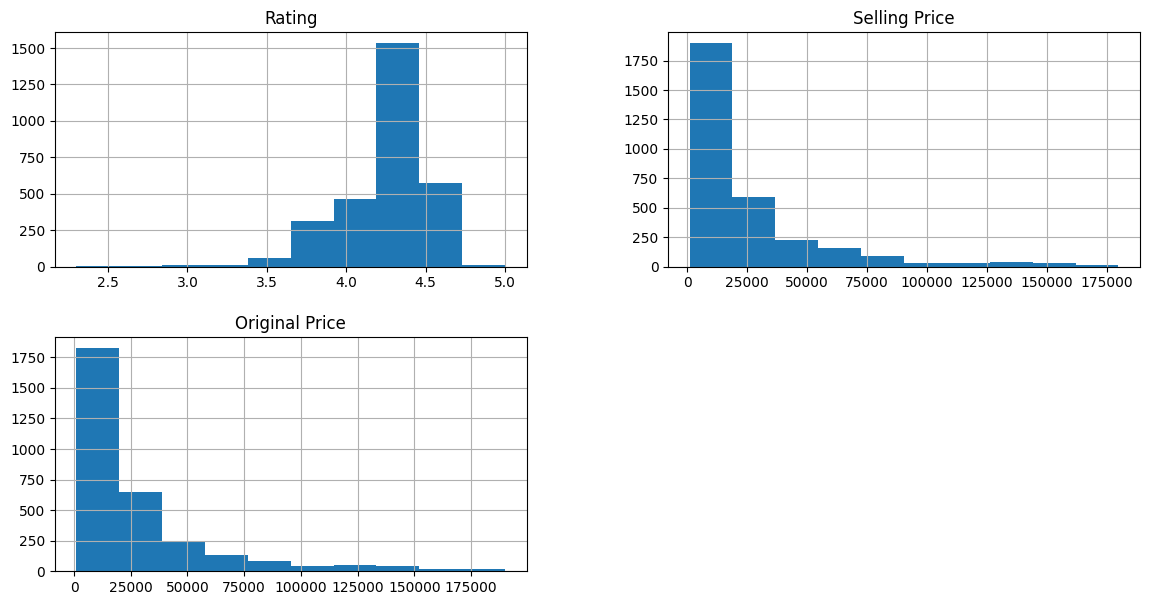

In [ ]:
df.hist(figsize=(14,7));

## Converting the Categorical into Numerical using LabelEncoder() Method

In [ ]:
#dummy=pd.get_dummies(data=df1,columns=['Brand','Model','Color','Memory','Storage']);
from sklearn.preprocessing import LabelEncoder
df2=df1.copy(deep=True);
label_encoders = {}
for column in ['Brand', 'Model','Memory','Storage']:
    encoder = LabelEncoder()
    df2[column + '_encoded'] = encoder.fit_transform(df2[column])
    label_encoders[column] = encoder
print(df.head())

  Brand Model            Color Memory Storage  Rating  Selling Price  \
0  OPPO   A53  Moonlight Black   4 GB   64 GB     4.5          11990   
1  OPPO   A53       Mint Cream   4 GB   64 GB     4.5          11990   
2  OPPO   A53  Moonlight Black   6 GB  128 GB     4.3          13990   
3  OPPO   A53       Mint Cream   6 GB  128 GB     4.3          13990   
4  OPPO   A53   Electric Black   4 GB   64 GB     4.5          11990   

   Original Price  
0           15990  
1           15990  
2           17990  
3           17990  
4           15990  


In [ ]:
df2.head(10)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Brand_encoded,Model_encoded,Memory_encoded,Storage_encoded
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,11,124,14,19
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,11,124,14,19
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,11,124,19,3
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,11,124,19,3
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,11,124,14,19
5,OPPO,A53,Electric Black,6 GB,128 GB,4.3,13990,17990,11,124,19,3
6,OPPO,A12,Deep Blue,4 GB,64 GB,4.4,10490,11990,11,104,14,19
7,OPPO,A12,Black,3 GB,32 GB,4.4,9490,10990,11,104,11,14
8,OPPO,A12,Blue,3 GB,32 GB,4.4,9490,10990,11,104,11,14
9,OPPO,A12,Flowing Silver,3 GB,32 GB,4.4,9490,10990,11,104,11,14


In [ ]:
df2.iloc[:,5:].head()


,Rating,Selling Price,Original Price,Brand_encoded,Model_encoded,Memory_encoded,Storage_encoded
0,4.5,11990,15990,11,124,14,19
1,4.5,11990,15990,11,124,14,19
2,4.3,13990,17990,11,124,19,3
3,4.3,13990,17990,11,124,19,3
4,4.5,11990,15990,11,124,14,19


In [ ]:
a=df2.iloc[:,5:].corr()
a

,Rating,Selling Price,Original Price,Brand_encoded,Model_encoded,Memory_encoded,Storage_encoded
Rating,1.000000,0.443602,0.434738,0.081127,0.177567,0.322305,-0.151593
Selling Price,0.443602,1.000000,0.981307,-0.312022,0.341076,0.179933,-0.147106
Original Price,0.434738,0.981307,1.000000,-0.292001,0.327261,0.198623,-0.158972
Brand_encoded,0.081127,-0.312022,-0.292001,1.000000,-0.382900,0.244746,-0.105828
Model_encoded,0.177567,0.341076,0.327261,-0.382900,1.000000,-0.045403,0.009413
Memory_encoded,0.322305,0.179933,0.198623,0.244746,-0.045403,1.000000,-0.377962
Storage_encoded,-0.151593,-0.147106,-0.158972,-0.105828,0.009413,-0.377962,1.000000


## Plot the Bar Graph of Models between Original and Selling Prices

In [ ]:
df2.loc[df2.Brand_encoded==5]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Brand_encoded,Model_encoded,Memory_encoded,Storage_encoded
249,IQOO,3,Quantum Silver,8 GB,128 GB,4.4,34990,37990,5,40,22,3
250,IQOO,3,Tornado Black,8 GB,128 GB,4.4,34990,37990,5,40,22,3
251,IQOO,3,Quantum Silver,8 GB,256 GB,4.4,37990,40990,5,40,22,12
252,IQOO,3,Tornado Black,8 GB,256 GB,4.4,37990,40990,5,40,22,12
253,IQOO,3,Tornado Black,12 GB,256 GB,4.4,39990,46990,5,40,4,12


        Brand       Model Memory  Original Price  Selling Price
1484  SAMSUNG  Galaxy F22   6 GB           16999          14999
1485  SAMSUNG  Galaxy F22   4 GB           14999          12999
1486  SAMSUNG  Galaxy F22   6 GB           16999          14999
1487  SAMSUNG  Galaxy F22   4 GB           14999          12999
1488  SAMSUNG  Galaxy F12   4 GB           12999          11499


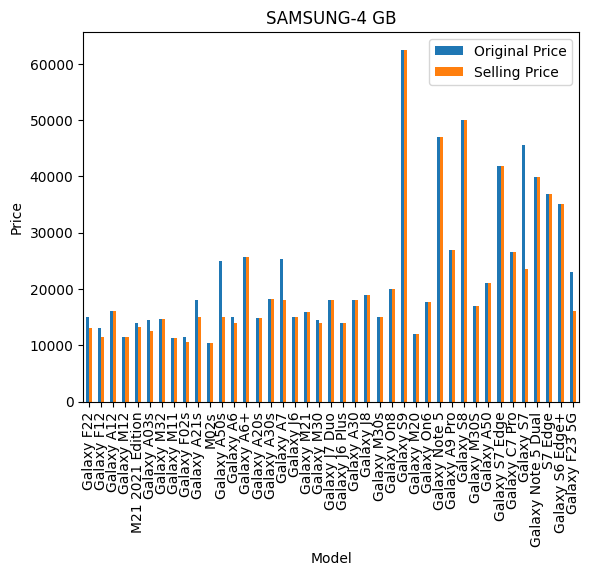

<Figure size 5000x5000 with 0 Axes>

In [ ]:
##df3=df1.iloc[:,:].copy(deep=True)
##df2["Brand"]=le.inverse_transform(df2["Brand"]);
name='SAMSUNG'
ram='4 GB'
import matplotlib.pyplot as plt
df3=df2.loc[df1['Brand']==name].copy(deep=True)
df3=df3[['Brand','Model','Memory','Original Price','Selling Price']]
##df3=df3.iloc[:,:].copy(deep=True)
print(df3.head())
col=['Brand','Model']
df3.drop_duplicates(subset=['Brand','Model','Memory'],inplace=True)
df3.loc[df3['Memory']==ram].plot(kind='bar',x='Model',y=['Original Price','Selling Price'])
plt.xlabel('Model')
plt.ylabel('Price')
plt.title(name+'-'+ram)
plt.figure(figsize=(50,50))
plt.show()

## Find the Dependent and Independent Variables

In [ ]:
x=df2[['Brand_encoded','Model_encoded','Memory_encoded','Storage_encoded','Rating','Original Price']];
y=df2['Selling Price'];



In [ ]:
x.head(10)


,Brand_encoded,Model_encoded,Memory_encoded,Storage_encoded,Rating,Original Price
0,11,124,14,19,4.5,15990
1,11,124,14,19,4.5,15990
2,11,124,19,3,4.3,17990
3,11,124,19,3,4.3,17990
4,11,124,14,19,4.5,15990
5,11,124,19,3,4.3,17990
6,11,104,14,19,4.4,11990
7,11,104,11,14,4.4,10990
8,11,104,11,14,4.4,10990
9,11,104,11,14,4.4,10990


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

## Model Building

### 1.Linear Regression Model





In [ ]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()


#### Fit the x_train,y_train in the Model

In [ ]:
slr.fit(x_train,y_train);

#### Predicting the y_test

In [ ]:
y_predi=slr.predict(x_test)

#### Finding the r2_score,accuracy_score,Root Mean Squared Error,Mean Absolute Error

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
r2=r2_score(y_test,y_predi)
print(y_test.shape)
print(y_predi.shape)
#print(slr.score(y_test,y_predi))
root_mean_square=np.sqrt(mean_squared_error(y_test,y_predi))
mean_absolute=mean_absolute_error(y_test,y_predi)
print("Linear Regression Algorithm")
print("r2 score : ",r2)
print("Root Mean Squared Error :",root_mean_square)
print("Mean Absolute Error :",mean_absolute)

(842,)
(842,)
Linear Regression Algorithm
r2 score :  0.9665213473703071
Root Mean Squared Error : 4823.914917768908
Mean Absolute Error : 2471.421448054099


#### Predicting the Model

In [ ]:
s_p=slr.predict([[11,125,19,3,4.5,17990]])
print("Selling Price :",s_p)

Selling Price : [16648.81051245]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
brand=df2.iloc[:,0].copy(deep=True)
print("List of Brands :",list(brand.drop_duplicates()))
user_input_brand=input("Enter the  brand = ")
model=df2.loc[df2['Brand']==user_input_brand,'Model'].copy(deep=True)
print("List of Models of  ",user_input_brand," Brand are ",list(model.drop_duplicates()))
user_input_model=input("Enter the  model = ")
memory=df2.loc[(df2['Model']==user_input_model)&(df2['Brand']==user_input_brand),'Memory']
print("List of Memory ",list(memory.drop_duplicates()))
user_input_memory=input("Enter the memory = ")
storage=df2.loc[(df2['Model']==user_input_model)&(df2['Brand']==user_input_brand)&(df2['Memory']==user_input_memory),'Storage']
print("List of Storages :",list(storage.drop_duplicates()))
user_input_storage=input("Ener the Storage = ")
user_rating=float(input("Enter the Rating "))

List of Brands : ['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme', 'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola', 'POCO', 'vivo', 'Xiaomi', 'Infinix']


In [ ]:
if((user_input_brand in list(brand.drop_duplicates())) & (user_input_model in list(model.drop_duplicates())) & (user_input_memory in list(memory.drop_duplicates())) & (user_input_storage in list(storage.drop_duplicates()))):
  error=1
else:
   error=0


In [ ]:
print(error)

0


In [ ]:
if error==1:
  user_brand_encoded = label_encoders['Brand'].transform([user_input_brand])[0]
  user_model_encoded = label_encoders['Model'].transform([user_input_model])[0]
  user_memory_encoded = label_encoders['Memory'].transform([user_input_memory])[0]
  user_storage_encoded = label_encoders['Storage'].transform([user_input_storage])[0]
  ##user_color_encoded = label_encoders['Color'].transform([user_input_color])[0]
else:
  print("error in inputs")

error in inputs


In [ ]:

print(user_storage_encoded)

19


In [ ]:
#Original price
if error==1:
  slr_or=DecisionTreeRegressor()
  a1=df2[['Brand_encoded','Model_encoded','Memory_encoded','Storage_encoded']];
  b1=df2['Original Price'];
  a1_train,a1_test,b1_train,b1_test=train_test_split(a1,b1,test_size=0.2,random_state=2)
  slr_or.fit(a1_train,b1_train);
  b_predi_org=slr_or.predict(a1_test)
  print(r2_score(b1_test,b_predi_org))
  original_predict=slr_or.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded]])
  print(original_predict)

In [ ]:
## RATING
if error==1:
  slr_rat=RandomForestRegressor()
  a=df2[['Brand_encoded','Model_encoded','Memory_encoded','Storage_encoded','Original Price']];
  b=df2['Rating'];
  a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=2)
  slr_rat.fit(a_train,b_train);
  b_predi_rat=slr_rat.predict(a_test)
  print(r2_score(b_test,b_predi_rat))
  origina= list(df2.loc[(df2['Brand_encoded'] == user_brand_encoded)&(df2['Model_encoded']==user_model_encoded)&(df2['Memory_encoded']==user_memory_encoded)|(df2['Storage_encoded']==user_storage_encoded),'Original Price'])
  origina=mean(origina)
  use_rating=slr_rat.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,original_predict[0]]])
  print(use_rating)



NameError: name 'error' is not defined

In [ ]:
if error==1:
  rf=RandomForestRegressor()
  rf.fit(x_train,y_train);
  ##df4=df2.drop_duplicates(subset=[''])
  ##df2.drop_duplicates(subset=['Brand','Model','Memory','Storage'],inplace=True)
  original= list(df2.loc[(df2['Brand_encoded'] == user_brand_encoded)&(df2['Model_encoded']==user_model_encoded)&(df2['Memory_encoded']==user_memory_encoded)|(df2['Storage_encoded']==user_storage_encoded),'Original Price'])
  ##print(original)
  rating=list(df2.loc[(df2['Brand_encoded']==user_brand_encoded)&(df2['Model_encoded']==user_model_encoded)|(df2['Memory_encoded']==user_memory_encoded),'Rating'])
  original=mean(original)
  ##print(original)
  ##print("Original Price :",original[0],"\n","Rating :",rating[0])
  ##print(user_brand_encoded," ",user_model_encoded," ",user_color_encoded," ",user_memory_encoded," ",user_storage_encoded," ",rating," ",original)
  print("Original Price :",original_predict,"Rating :",user_rating)
  s_p=rf.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,user_rating,original_predict[0]]])
  print("Selling Price is ",s_p)
  print("Discount (%):",((original_predict[0]-s_p)/original_predict[0])*100)
  print("Rating by prediction")
  print("Original Price :",original_predict,"Rating :",use_rating)
  s_p_rat=rf.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,use_rating[0],original_predict[0]]])
  ##s_p=slr.predict(["OPPO","A53","Blue","4 GB","64 GB",rating,original])
  print("Selling Price is ",s_p_rat)
  print("Discount (%):",((original_predict[0]-s_p_rat)/original_predict[0])*100)

Original Price : [53990.] Rating : 3.0
Selling Price is  [52358.69]
Discount (%): [3.02150398]
Rating by prediction
Original Price : [53990.] Rating : [4.577]
Selling Price is  [53739.1]
Discount (%): [0.46471569]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


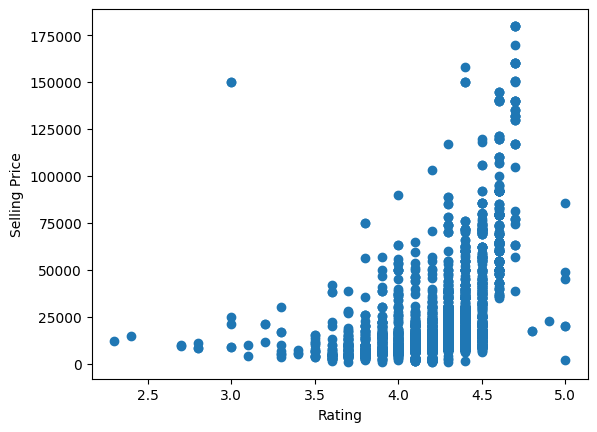

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x.iloc[:,4],y)
plt.xlabel('Rating')
plt.ylabel('Selling Price')
plt.show()

###2.Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
if error==1:
  model=RandomForestRegressor()
  model.fit(x_train,y_train)
  rand_pred=model.predict(x_test)
  r2=r2_score(y_test,rand_pred);
  root_mean_square=np.sqrt(mean_squared_error(y_test,y_predi))
  mean_absolute=mean_absolute_error(y_test,y_predi)
  print("Random Forest Regression Algorithm")
  print("r2 score : ",r2)
  print("Root Mean Squared Error :",root_mean_square)
  print("Mean Absolute Error :",mean_absolute)
  ##sp_rf=model.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,rating[0],original]])
  sp_rf=model.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,user_rating,original_predict[0]]])
  #sp_rf=model.predict([[11,125,19,3,4.3,17990]])
  print("Selling Price =",sp_rf)


### 3.Decision Tree Regressor

In [ ]:
# prompt: Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
if error==1:
  model1 = DecisionTreeRegressor()
  model1.fit(x_train,y_train)
  y_pred1=model1.predict(x_test)
  #print(r2_score(y_test,y_pred1))
  root_mean_square=np.sqrt(mean_squared_error(y_test,y_predi))
  mean_absolute=mean_absolute_error(y_test,y_predi)
  print("Decision Tree Regression Algorithm")
  print("r2 score : ",r2)
  print("Root Mean Squared Error :",root_mean_square)
  print("Mean Absolute Error :",mean_absolute)
  #sp_dt=model1.predict([[11,125,19,3,4.3,17990]])
  ##sp_dt=model1.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,rating[0],original]])
  sp_dt=model1.predict([[user_brand_encoded,user_model_encoded,user_memory_encoded,user_storage_encoded,user_rating,original_predict[0]]])
  print("Selling Price =",sp_dt)
